In [2]:
from textstat.textstat import textstat
import csv

In [3]:
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline

# Reading Level Analysis for All cruz

In [4]:
cruz_df = pandas.read_csv('data/all_cruz.csv')
print len(cruz_df)

#cruz_df['A'] = df['A'].astype('str')
cruz_df.head()


1161


,title,url,org,date_written,byline,body
0,11 million watch Trump and Cruz spar on Fox Bu...,http://www.latimes.com/la-et-ct-debate-ratings...,latimes,2016-01-15 20:25:00,NaN,Fox Business Network\n's Republican primary de...
1,"538 projects Cruz, Clinton to win Iowa",http://www.politico.com/story/2016/01/538-cruz...,politico,2016-01-17 18:24:55,NaN,\n2016\n\n ...
2,"A Cruz, Rubio battle over undecided Iowans int...",http://hosted2.ap.org/APDEFAULT/3d281c11a96b4a...,ap,2016-01-06 20:28:00,NaN,"CEDAR RAPIDS, Iowa (AP) â Marco Rubio and Te..."
3,A Cruz-Rubio feud flares in Iowa closer,http://hosted2.ap.org/apdefault/3d281c11a96b4a...,ap,2016-01-30 17:54:00,NaN,"MANCHESTER, Iowa (AP) â As if hearing Marco ..."
4,A Cruz-Rubio ticket may be the only way to sto...,http://www.latimes.com/la-oe-0223-goldberg-tru...,latimes,2016-02-23 13:00:00,NaN,"As things stand, Donald Trump is the presumpti..."


Average Flesch-Kincaid grade for AP stories: 8.84978466839


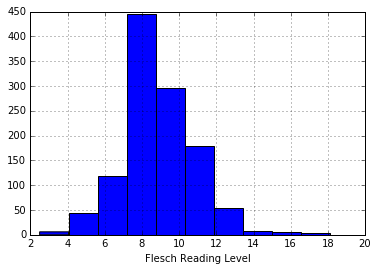

In [5]:
cruz_df['flesch'] = cruz_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
print "Average Flesch-Kincaid grade for AP stories:", cruz_df['flesch'].mean()
# Average Flesch-Kincaid grade for AP stories: 9.97941176471
cruz_df['flesch'].hist().set_xlabel("Flesch Reading Level") 

Average Gunning-Fog grade for AP stories: 9.46391042205


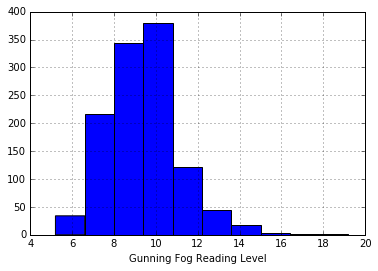

In [6]:
cruz_df['gunning_fog'] = cruz_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
print "Average Gunning-Fog grade for AP stories:", cruz_df['gunning_fog'].mean()
# Average Flesch-Kincaid grade for AP stories: 9.85789473684
cruz_df['gunning_fog'].hist().set_xlabel("Gunning Fog Reading Level") 

# Reading level by Org

In [7]:
orgs = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']
for o in orgs:
    cruz_df['flesch_' + o] = cruz_df[cruz_df['org'] == o]['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
    print "Average Flesch-Kincaid grade for " + o + " stories:", cruz_df['flesch_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Flesch-Kincaid grade for nyt stories: 6.90593220339
Average Flesch-Kincaid grade for wsj stories: 7.72235294118
Average Flesch-Kincaid grade for cnn stories: 9.70853658537
Average Flesch-Kincaid grade for fox stories: 8.95985915493
Average Flesch-Kincaid grade for ap stories: 9.36829268293
Average Flesch-Kincaid grade for reuters stories: 9.72051282051
Average Flesch-Kincaid grade for politico stories: 8.60791366906
Average Flesch-Kincaid grade for mcclatchy stories: 8.436
Average Flesch-Kincaid grade for buzzfeed stories: 12.3523809524
Average Flesch-Kincaid grade for huffpo stories: 9.26263736264
Average Flesch-Kincaid grade for latimes stories: 10.0178571429


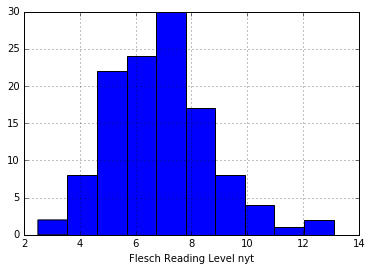

In [8]:
o = 'nyt'
cruz_df['flesch_'+ o].hist().set_xlabel("Flesch Reading Level " + o) 

In [9]:
for o in orgs:
    cruz_df['gunning_' + o] = cruz_df[cruz_df['org'] == o]['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
    print "Average Gunning Fog grade for " + o + " stories:", cruz_df['gunning_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Gunning Fog grade for nyt stories: 7.6
Average Gunning Fog grade for wsj stories: 8.0
Average Gunning Fog grade for cnn stories: 9.97804878049
Average Gunning Fog grade for fox stories: 9.14929577465
Average Gunning Fog grade for ap stories: 9.35284552846
Average Gunning Fog grade for reuters stories: 9.34358974359
Average Gunning Fog grade for politico stories: 10.6503597122
Average Gunning Fog grade for mcclatchy stories: 8.56
Average Gunning Fog grade for buzzfeed stories: 12.0952380952
Average Gunning Fog grade for huffpo stories: 9.11208791209
Average Gunning Fog grade for latimes stories: 9.71428571429


In [10]:
for o in orgs:
    cruz_df['ease_' + o] = cruz_df[cruz_df['org'] == o]['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)
    print "Average F-K Reading Ease for " + o + " stories:", cruz_df['ease_' + o].mean()
 
    

Average F-K Reading Ease for nyt stories: 70.5311864407
Average F-K Reading Ease for wsj stories: 66.504
Average F-K Reading Ease for cnn stories: 60.9826829268
Average F-K Reading Ease for fox stories: 62.6896478873
Average F-K Reading Ease for ap stories: 60.5921138211
Average F-K Reading Ease for reuters stories: 58.0492307692
Average F-K Reading Ease for politico stories: 71.8638848921
Average F-K Reading Ease for mcclatchy stories: 63.7996
Average F-K Reading Ease for buzzfeed stories: 51.5004761905
Average F-K Reading Ease for huffpo stories: 60.3101098901
Average F-K Reading Ease for latimes stories: 57.6432142857
